In [155]:
import pandas as pd
import numpy as np
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
%matplotlib inline

In [156]:
tickers=['^GSPC','BA','JPM','CCL','C','STX','WELL','EPR','XOM','HP','INTC','IBM','KSS',
         'LUV','WFC','CC','WYNN','FEYE','ENPH','OPEN','MSFT','FRO','SBUX','T','NAT','IVR','NL'
        ]
tickers=['^GSPC','HP'
        ]
weights=np.random.random(len(tickers))
weights /= sum(weights)
sum(weights)

1.0

In [157]:
sec_prices=pd.DataFrame()
for t in tickers:
    print(t)
    sec_prices[t]=wb.DataReader(t,data_source='yahoo',start='2010-1-1')['Adj Close']
sec_prices

^GSPC
HP


,^GSPC,HP
Date,,
2010-01-04,1132.989990,28.079103
2010-01-05,1136.520020,29.717842
2010-01-06,1137.140015,30.801420
2010-01-07,1141.689941,30.995371
2010-01-08,1144.979980,32.105698
...,...,...
2021-04-01,4019.870117,28.440001
2021-04-05,4077.909912,26.850000
2021-04-06,4073.939941,26.889999


In [158]:
sec_price_changes=round(sec_prices/sec_prices.iloc[0],5)*100
sec_price_changes

,^GSPC,HP
Date,,
2010-01-04,100.000,100.000
2010-01-05,100.312,105.836
2010-01-06,100.366,109.695
2010-01-07,100.768,110.386
2010-01-08,101.058,114.340
...,...,...
2021-04-01,354.802,101.285
2021-04-05,359.925,95.623
2021-04-06,359.574,95.765


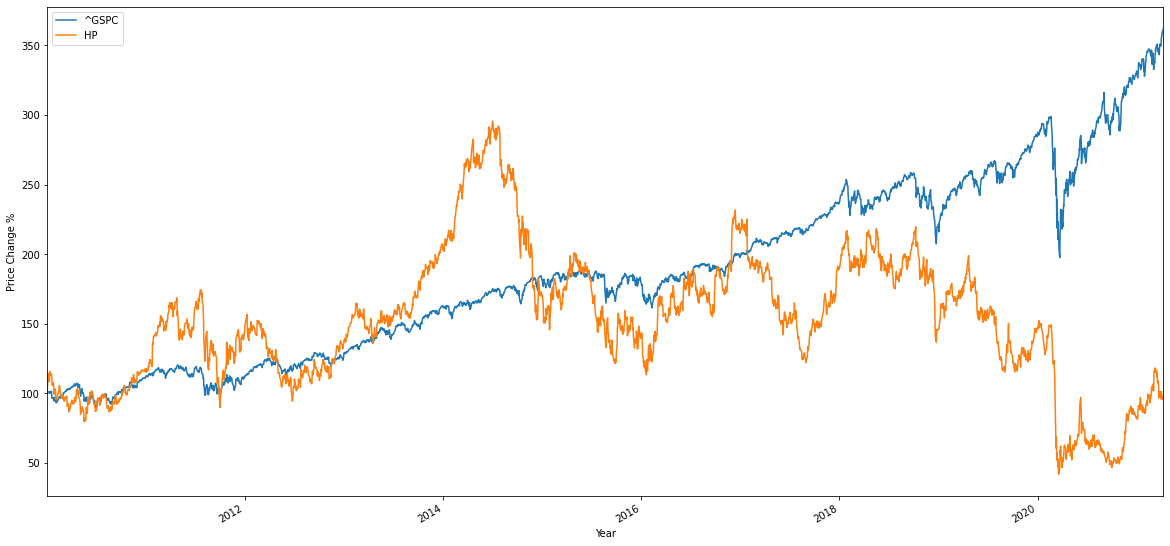

In [159]:
sec_price_changes.plot(figsize=(20,10))
plt.xlabel("Year")
plt.ylabel("Price Change %")
plt.show()

In [160]:
sec_returns=np.log(sec_prices/sec_prices.shift(1))
sec_returns

,^GSPC,HP
Date,,
2010-01-04,NaN,NaN
2010-01-05,0.003111,0.056722
2010-01-06,0.000545,0.035813
2010-01-07,0.003993,0.006277
2010-01-08,0.002878,0.035196
...,...,...
2021-04-01,0.011756,0.053442
2021-04-05,0.014335,-0.057531
2021-04-06,-0.000974,0.001489


In [161]:
sec_annual_return=sec_returns.mean()*250
sec_annual_return

^GSPC    0.113394
HP      -0.003784
dtype: float64

In [162]:
sec_covariance_matrix=sec_returns.cov()*250
sec_covariance_matrix

,^GSPC,HP
^GSPC,0.030439,0.048526
HP,0.048526,0.214407


In [163]:
sec_corelation_matrix=sec_prices.corr()
sec_corelation_matrix

,^GSPC,HP
^GSPC,1.00000,-0.03233
HP,-0.03233,1.00000


In [164]:
portfolio_annual_returns=sum(weights*sec_returns.mean()*250)
portfolio_annual_returns

0.06483558225659503

In [165]:
portfolio_anual_variance=np.dot(weights.T, np.dot(sec_returns.cov()*250,weights))
portfolio_anual_variance

0.07080939722725049

In [166]:
portfolio_volatity=np.sqrt(np.dot(weights.T,np.dot(sec_returns.cov()*250,weights)))
portfolio_volatity

0.2661003517984343

In [167]:
portfolio_returns=[]
portfolio_volatilities=[]
for x in range(1000):
    weights=np.random.random(len(tickers))
    weights /=sum(weights)
    portfolio_returns.append(sum(weights*sec_returns.mean()*250))
    portfolio_volatilities.append(np.sqrt(np.dot(weights.T,np.dot(sec_returns.cov()*250,weights))))

portfolio_returns, portfolio_volatilities

([0.0689417525554012,
  0.08900267253342294,
  0.10559033550963774,
  0.030788562638902988,
  -0.001080137821023103,
  0.09383489425372254,
  0.08571145295422067,
  0.10312746014820669,
  0.051045795793063856,
  0.03740323951142003,
  0.0715677479223804,
  0.04443427292675869,
  0.002569359811405005,
  0.05738317145854743,
  0.07544272904871575,
  0.008027000790176918,
  0.0689767607065609,
  0.053061060085665974,
  0.0952635857061639,
  0.04758111461375035,
  0.0783283646485078,
  -0.0033236880006323266,
  0.03893365230752485,
  -0.0012122867563491152,
  0.10375854846330076,
  0.10406014738221857,
  0.04845565356812078,
  0.11338446944227937,
  0.08607606923700813,
  0.08389459989081564,
  0.048960190092495,
  0.09308832070273038,
  0.054212182858469606,
  0.06581392869978189,
  0.04294039269494664,
  0.07143218018802829,
  0.07293261112839669,
  0.029382969032503838,
  0.07634360431859126,
  0.03705894195740329,
  0.04400678716687385,
  0.052332804911952,
  0.0532199994621865,
  0.07

In [168]:
portfolio_returns=np.array(portfolio_returns)
portfolio_volatilities=np.array(portfolio_volatilities)

portfolio_returns, portfolio_volatilities

(array([ 6.89417526e-02,  8.90026725e-02,  1.05590336e-01,  3.07885626e-02,
        -1.08013782e-03,  9.38348943e-02,  8.57114530e-02,  1.03127460e-01,
         5.10457958e-02,  3.74032395e-02,  7.15677479e-02,  4.44342729e-02,
         2.56935981e-03,  5.73831715e-02,  7.54427290e-02,  8.02700079e-03,
         6.89767607e-02,  5.30610601e-02,  9.52635857e-02,  4.75811146e-02,
         7.83283646e-02, -3.32368800e-03,  3.89336523e-02, -1.21228676e-03,
         1.03758548e-01,  1.04060147e-01,  4.84556536e-02,  1.13384469e-01,
         8.60760692e-02,  8.38945999e-02,  4.89601901e-02,  9.30883207e-02,
         5.42121829e-02,  6.58139287e-02,  4.29403927e-02,  7.14321802e-02,
         7.29326111e-02,  2.93829690e-02,  7.63436043e-02,  3.70589420e-02,
         4.40067872e-02,  5.23328049e-02,  5.32199995e-02,  7.21601452e-02,
         5.20924416e-02,  6.34975653e-02,  4.02682300e-02,  7.55253423e-02,
         1.53537229e-02,  6.45760633e-02,  7.61109213e-02,  6.34624450e-02,
         5.1

In [169]:
portfolio=pd.DataFrame({'Return':portfolio_returns, 'Volatility':portfolio_volatilities})
portfolio

,Return,Volatility
0,0.068942,0.255795
1,0.089003,0.210648
2,0.105590,0.183040
3,0.030789,0.359705
4,-0.001080,0.454785
...,...,...
995,0.045683,0.317319
996,0.042253,0.326920
997,0.031036,0.358988
998,0.013006,0.412193


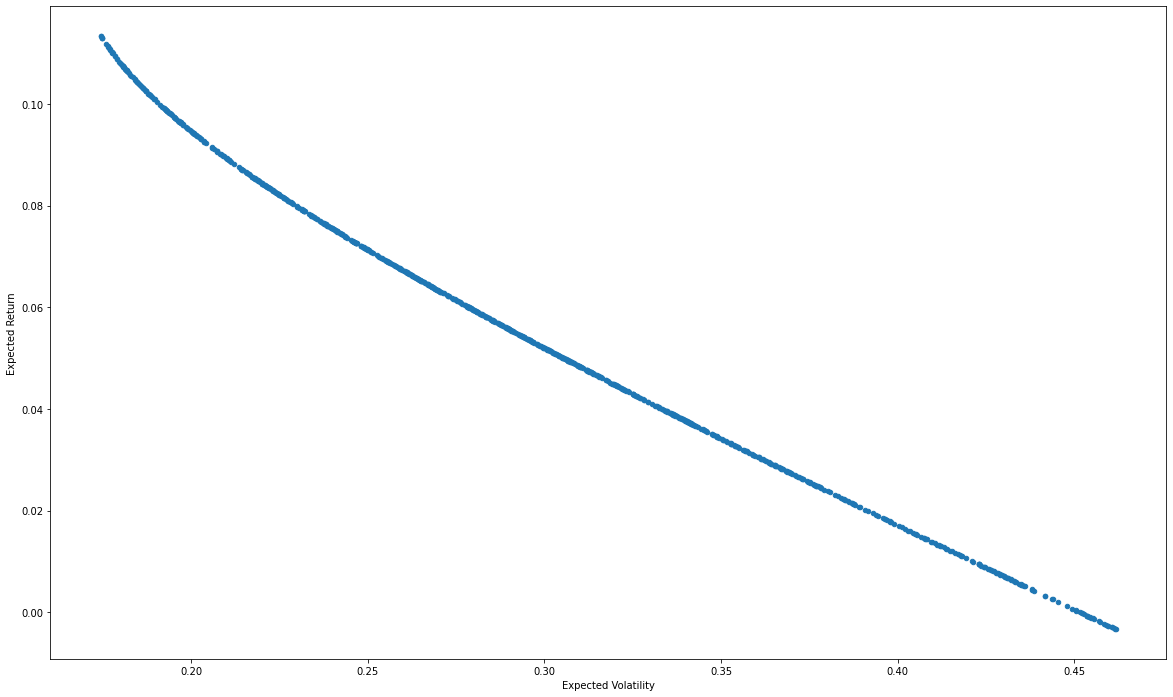

In [170]:
portfolio.plot(x='Volatility', y='Return',kind='scatter', figsize=(20,12))
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')
plt.show()
